In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [11]:
PATH = "/home/socky/tensorflow_jupyter/notebooks/tensorflow/tf3_model"

In [12]:
train_dir = os.path.join(PATH, 'train')
test_dir = os.path.join(PATH, 'test')

yes_dir = os.path.join(train_dir, 'yes_car')  # directory with our training cat pictures
no_dir = os.path.join(train_dir, 'no_car')  # directory with our training dog pictures

test_yes_dir = os.path.join(test_dir, 'yes')  # directory with our training cat pictures
test_no_dir = os.path.join(test_dir, 'no')  # directory with our training dog pictures

num_yes_train = len(os.listdir(yes_dir))
num_no_train = len(os.listdir(no_dir))
num_yes_test = len(os.listdir(test_yes_dir))
num_no_test = len(os.listdir(test_no_dir))

total_train = num_yes_train + num_no_train
total_test = num_yes_test + num_no_test

In [13]:
print('total training yes images:', num_yes_train)
print('total training not images:', num_no_train)

print("--")
print("Total training images:", total_train)


print('total test yes images:', num_yes_test)
print('total test not images:', num_no_test)

print("--")
print("Total test images:", total_test)

total training yes images: 1383
total training not images: 144
--
Total training images: 1527
total test yes images: 181
total test not images: 225
--
Total test images: 406


In [14]:
batch_size = 32
epochs = 3
IMG_HEIGHT = 100
IMG_WIDTH = 100

In [15]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')


test_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data

test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=test_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 1527 images belonging to 2 classes.
Found 406 images belonging to 2 classes.


In [16]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [17]:
sample_training_images, sample_training_labels = next(train_data_gen)

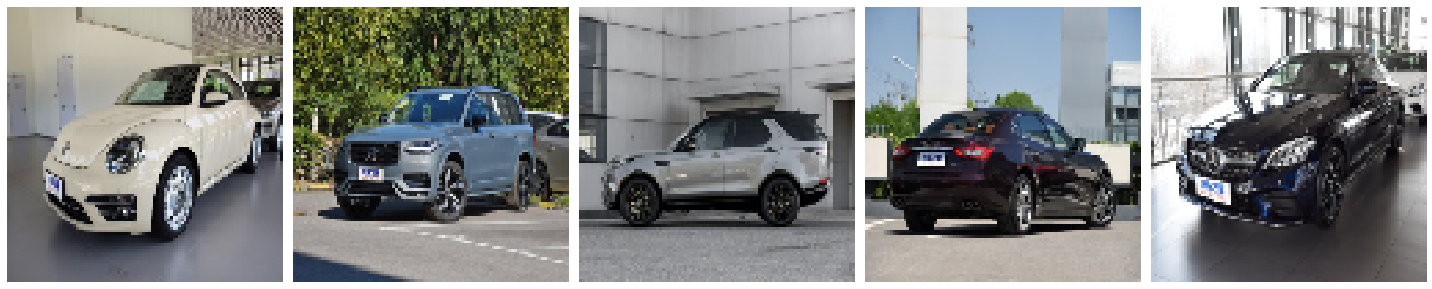

In [18]:
plotImages(sample_training_images[:5])

In [21]:

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0

In [23]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=200,
    epochs=10,
    validation_data=train_data_gen,
    validation_steps=32
)

Epoch 1/10
200/200 [==============================] - 116s 579ms/step - loss: 0.0787 - acc: 0.9681 - val_loss: 0.0129 - val_acc: 0.9941
Epoch 2/10
139/200 [===================>..........] - ETA: 33s - loss: 0.0137 - acc: 0.9948

KeyboardInterrupt: 

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [40]:
model.save("./model2/")

INFO:tensorflow:Assets written to: ./model2/assets


In [20]:
restored_keras_model = tf.keras.models.load_model("./model2/saved_model.pb")



OSError: Unable to open file (file signature not found)

In [15]:
history = restored_keras_model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/3
62/62 [==============================] - 30s 481ms/step - loss: 0.6875 - accuracy: 0.6901 - val_loss: 0.3618 - val_accuracy: 0.8095
Epoch 2/3
62/62 [==============================] - 29s 461ms/step - loss: 0.3284 - accuracy: 0.8549 - val_loss: 0.3115 - val_accuracy: 0.8599
Epoch 3/3
62/62 [==============================] - 29s 470ms/step - loss: 0.1063 - accuracy: 0.9669 - val_loss: 0.3624 - val_accuracy: 0.8528


In [33]:
model2_path = "./model2"
tf.saved_model.save(restored_keras_model, model2_path)

INFO:tensorflow:Assets written to: ./model2/assets


In [66]:
test_loss, test_acc = restored_keras_model.evaluate_generator(test_data_gen)
print('\nTest accuracy:', test_acc)


Test accuracy: 0.9039409


In [67]:
import pathlib

f_dir = pathlib.Path("/tf/notebooks/tensorflow/tf3_model/test")
f_count = len(list(f_dir.glob('*/*.jpg')))
f_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
FCLASS_NAMES = np.array([item.name for item in f_dir.glob('*') ])
f_data_gen = f_generator.flow_from_directory(directory=str(f_dir),
                                                     batch_size=10,
                                                     shuffle=True,
                                                     target_size=(100, 100),
                                                     classes = list(FCLASS_NAMES))


def show_batch(image_batch, label_batch):
  plt.figure(figsize=(20,20))
  for n in range(10):
      ax = plt.subplot(1,10,n+1)
      plt.imshow(image_batch[n])
      plt.title(FCLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

Found 406 images belonging to 2 classes.


In [72]:
f_image_batch, f_label_batch = next(f_data_gen)
f_predictions = restored_keras_model.predict(f_image_batch)
# print(f_predictions)
for item in f_predictions:
    if item < 0:
        print("no")
    else:
        print("yes")
        
show_batch(f_image_batch, f_label_batch)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()